In [2]:
!pip install scikit-optimize

In [3]:
!pip install statsmodels

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [6]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [7]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [8]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [9]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [10]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [11]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [12]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [13]:
import pickle

with open('./RATINGS_OKKO_item_coldstart_dataset.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [14]:
df.shape

(9323, 20)

In [15]:
df

,availability,actor,age_access_type,country,average_rating,duration,type,name,release_year,genre,director,element_uid,subscription_only,av_rate_x,av_rate_y,users_number_x,users_number_y,user_count_3months,av_ratings_3months,min_ts
0,[SUBSCRIPTION],"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...",18,[usa],6.99,3780000,MOVIE,Прожарка Чарли Шина,2011,"[Comedy, Documentary]",[1de22aff-430e-4af9-bf1d-159dbf8e9269],3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,True,0.004276,0.003705,21,22,21,0.004276,2020-11-10 00:37:34
1,[SUBSCRIPTION],"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a805fdd...",18,[usa],6.0,3780000,MOVIE,Прожарка Уильяма Шэтнера,2006,[Comedy],[1de22aff-430e-4af9-bf1d-159dbf8e9269],cdfa700f-122d-41e5-b8dc-9c6813bab6d2,True,0.000000,-0.004808,2,4,2,0.000000,2020-12-17 01:36:56
2,[SUBSCRIPTION],"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a51b376...",0,"[usa, canada]",6.21,4860000,MOVIE,Большое путешествие,2006,"[Family, 287a1485-7a88-4c2f-bc94-ca418b6c47a1]",[fe598c84-ef4f-47c7-91af-d5cbd89c4e8d],d8b55146-dee5-4498-957c-5614414b48fb,True,-0.043478,-0.041667,1,1,1,-0.043478,2020-09-23 17:37:14
3,[SUBSCRIPTION],"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 873fd46...",6,"[canada, france]",6.4,5520000,MOVIE,Пламенное сердце,2022,"[Comedy, Adventure, Family, 287a1485-7a88-4c2f...","[40f78e6d-3c9f-434f-a505-c6ffdd045763, 332105c...",ba6bec1a-3aa9-48c7-aa65-908c21627a12,True,0.018286,0.017220,1565,1600,1565,0.018286,2022-05-27 18:24:26
4,"[DTO, RENT]","[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 39124be...",16,[usa],NaN,5280000,MOVIE,Роман с кукушкой,2021,"[Comedy, Melodrama, Drama]",[f5fba6fe-94b3-4e69-acfc-da6867320386],a367ca50-ef7d-4a4c-b89a-c8692defa697,False,0.010101,0.006173,5,6,5,0.010101,2022-07-14 11:49:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,NaN,"[0ff8332b-9669-4337-a78c-fce4956c3be0, a999ee1...",0,[russia],6.3,0,SERIAL,Царевны,2018,[287a1485-7a88-4c2f-bc94-ca418b6c47a1],"[f6e19572-c969-4926-8777-0b0f0084e5b6, 97a6906...",ca50fd7c-41c5-4208-9f72-06d78fc602b5,False,0.004893,0.004512,59,59,59,0.004512,2020-09-20 09:34:03
9319,[SUBSCRIPTION],[d08bba89-e937-40f3-b2a7-7ea26de4c246],0,[russia],NaN,24360000,SERIAL,Великие Империи мира,2014,"[Documentary, d7214feb-8c11-4aea-aabb-ac98a8d5...",[384deeb0-ab24-4e3f-9744-1660b2ecaf67],74a2e6ef-fa37-4225-ab62-231dbfdf5a30,True,0.004016,0.003175,1,1,1,0.003175,2022-08-26 11:57:50
9320,[SUBSCRIPTION],[d08bba89-e937-40f3-b2a7-7ea26de4c246],0,[russia],NaN,33360000,SERIAL,Русские цари,2011,"[Documentary, d7214feb-8c11-4aea-aabb-ac98a8d5...",[384deeb0-ab24-4e3f-9744-1660b2ecaf67],a1834bce-7554-4106-828f-164a17503f51,True,0.009709,0.014184,1,2,2,0.014184,2022-08-26 12:12:06
9321,"[SUBSCRIPTION, AVOD]",[50ed4519-ad24-47b3-b135-947dba796372],6,[russia],NaN,3600000,SERIAL,Большие игры,2022,"[ForKids, 1f22ccf1-288a-4e6e-b39a-7502799e7125]",[ad784ddb-a602-4082-bf6f-f83ec5a96edf],ce8d2906-a33f-4140-9ffe-e091990d71a4,False,0.005922,0.005141,11,14,14,0.005141,2022-08-24 11:32:52


In [16]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [17]:
all_unique_genres = set(all_genres)

In [18]:
len(all_unique_genres)

32

In [19]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '66fad8c3-d84f-458d-a8bf-5b4f154969e0',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Travel',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [20]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [21]:
decoded_genres

['Family',
 'ArtHouse',
 'Drama',
 'Sport',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 'Horror',
 'History',
 'War_movies',
 'Sci-Fi',
 'Detective',
 'Biography',
 'Cartoons',
 'Action',
 'Thriller',
 'Theater',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'Fantasy',
 'Crime',
 'Travel',
 'Documentary',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'Comedy',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 'Music',
 'Shorts',
 'Anime',
 'ForKids',
 'Melodrama',
 'Humor',
 'Adventure',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'Show']

In [22]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 28834
======country======
Len: 102
======genre======
Len: 32
======director======
Len: 6889


# Preprocessing

In [23]:
prep_df = df.copy(deep=True)

In [24]:
prep_df.shape

(9323, 20)

### filter by year

In [25]:
prep_df = prep_df[prep_df['release_year'] >= 2000]

### topN

In [26]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]
    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

In [27]:
def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [28]:
top10genres, name = add_topN_feature(prep_df, 'genre', 10)
prep_df = ohe_topN_features(prep_df, top10genres, name)

In [29]:
top10actors, name = add_topN_feature(prep_df, 'actor', 10)
prep_df = ohe_topN_features(prep_df, top10actors, name)

In [30]:
top3directors, name = add_topN_feature(prep_df, 'director', 3)
prep_df = ohe_topN_features(prep_df, top3directors, name)

In [31]:
top5countries, name = add_topN_feature(prep_df, 'country', 5)
prep_df = ohe_topN_features(prep_df, top5countries, name)

In [32]:
prep_df.dropna(subset=['availability'], inplace=True)

In [33]:
avail, name = add_topN_feature(prep_df, 'availability', len(prep_df['availability']))
prep_df = ohe_topN_features(prep_df, avail, name)

In [34]:
prep_df.drop(['FVOD'], axis=1, inplace=True)

In [35]:
prep_df.head().T

,0,1,2,3,4
age_access_type,18,18,0,6,16
average_rating,6.99,6.0,6.21,6.4,NaN
duration,3780000,3780000,4860000,5520000,5280000
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
name,Прожарка Чарли Шина,Прожарка Уильяма Шэтнера,Большое путешествие,Пламенное сердце,Роман с кукушкой
release_year,2011,2006,2006,2022,2021
element_uid,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,cdfa700f-122d-41e5-b8dc-9c6813bab6d2,d8b55146-dee5-4498-957c-5614414b48fb,ba6bec1a-3aa9-48c7-aa65-908c21627a12,a367ca50-ef7d-4a4c-b89a-c8692defa697
subscription_only,True,True,True,True,False
av_rate_x,0.004276,0.0,-0.043478,0.018286,0.010101
av_rate_y,0.003705,-0.004808,-0.041667,0.01722,0.006173


In [36]:
prep_df.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'Drama', 'Comedy', 'Thriller', 'Action',
       '287a1485-7a88-4c2f-bc94-ca418b6c47a1', 'Adventure', 'Melodrama',
       '364fdc2e-bdfe-40be-b2c5-d30f43ec432e', 'Sci-Fi', 'Family',
       'd08bba89-e937-40f3-b2a7-7ea26de4c246',
       'fd401c6b-3e00-4f7f-aea7-5512df6b91e0',
       '5463b4bc-e332-415c-aca8-11c0f217a9eb',
       'fbdae856-85b9-4d4a-96dd-cc383571a488',
       '9703b641-2566-4e58-aebb-8d140805c0f3',
       '586f8d5a-2f17-42a3-b066-667f7c26a842',
       'dfd861c4-d2de-4bb6-bc6e-bae3f92a18a9',
       '43dc7096-090a-4c75-9e78-5f14da3ded36',
       '2ab01676-2af6-4abb-8dde-dc51e7e22372',
       'b6a30330-1dcb-4093-b6a9-ce0f779874c2',
       '751aebbe-2d4d-4421-bace-d44b8e10c8eb',
       'f7ded2b9-7c98-47ab-bfc4-57fb60bf9

In [37]:
cols = ['age_access_type', 'average_rating', 'duration',
       'type','av_ratings_3months',
       'subscription_only', 
       'top10genre_Drama', 'top10genre_Comedy',
       'top10genre_Thriller', 'top10genre_Action', 'top10genre_Adventure',
       'top10genre_Melodrama',
       'top10genre_364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
       'top10genre_287a1485-7a88-4c2f-bc94-ca418b6c47a1', 'top10genre_Family',
       'top10genre_Sci-Fi', 'top10actor_d08bba89-e937-40f3-b2a7-7ea26de4c246',
       'top10actor_fd401c6b-3e00-4f7f-aea7-5512df6b91e0',
       'top10actor_5463b4bc-e332-415c-aca8-11c0f217a9eb',
       'top10actor_5f3f6dc9-15fd-464f-91bc-b98c1e467f04',
       'top10actor_bebdaaad-69e1-49c4-ab58-89fc9acafaad',
       'top10actor_fbdae856-85b9-4d4a-96dd-cc383571a488',
       'top10actor_dfd861c4-d2de-4bb6-bc6e-bae3f92a18a9',
       'top10actor_586f8d5a-2f17-42a3-b066-667f7c26a842',
       'top10actor_ce6772e5-3c2a-45a1-922a-42fcd71c6f61',
       'top10actor_9703b641-2566-4e58-aebb-8d140805c0f3',
       'top3director_f7ded2b9-7c98-47ab-bfc4-57fb60bf946c',
       'top3director_751aebbe-2d4d-4421-bace-d44b8e10c8eb',
       'top3director_98f07d1e-d498-49b3-8ac8-30a5fc1dabfc', 'top5country_usa',
       'top5country_russia', 'top5country_great-britain', 'top5country_france',
       'top5country_ussr', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD']

In [38]:
prep_df = prep_df[cols]

KeyError: "['top10genre_Drama', 'top10genre_Comedy', 'top10genre_Thriller', 'top10genre_Action', 'top10genre_Adventure', 'top10genre_Melodrama', 'top10genre_364fdc2e-bdfe-40be-b2c5-d30f43ec432e', 'top10genre_287a1485-7a88-4c2f-bc94-ca418b6c47a1', 'top10genre_Family', 'top10genre_Sci-Fi', 'top10actor_d08bba89-e937-40f3-b2a7-7ea26de4c246', 'top10actor_fd401c6b-3e00-4f7f-aea7-5512df6b91e0', 'top10actor_5463b4bc-e332-415c-aca8-11c0f217a9eb', 'top10actor_5f3f6dc9-15fd-464f-91bc-b98c1e467f04', 'top10actor_bebdaaad-69e1-49c4-ab58-89fc9acafaad', 'top10actor_fbdae856-85b9-4d4a-96dd-cc383571a488', 'top10actor_dfd861c4-d2de-4bb6-bc6e-bae3f92a18a9', 'top10actor_586f8d5a-2f17-42a3-b066-667f7c26a842', 'top10actor_ce6772e5-3c2a-45a1-922a-42fcd71c6f61', 'top10actor_9703b641-2566-4e58-aebb-8d140805c0f3', 'top3director_f7ded2b9-7c98-47ab-bfc4-57fb60bf946c', 'top3director_751aebbe-2d4d-4421-bace-d44b8e10c8eb', 'top3director_98f07d1e-d498-49b3-8ac8-30a5fc1dabfc', 'top5country_usa', 'top5country_russia', 'top5country_great-britain', 'top5country_france', 'top5country_ussr'] not in index"

In [ ]:
skewed_num_features = ['duration'] # can try 'average_rating'

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

class Preprocesser:
    def __init__(self, 
#                 mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
#                 mltpl_cat_n_top: dict
                ):
#         self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
#         self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
#         df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [ ]:
preprocesser = Preprocesser(
#     mltpl_cat_features,
            skewed_num_features,
            #text_features,
#             mltpl_cat_n_top
                           )

In [ ]:
df_pr = preprocesser.preprocess(prep_df)

In [ ]:
df_pr.isnull().sum()

In [ ]:
df_pr['subscription_only'] = df_pr['subscription_only'].astype(int)

In [ ]:
df_pr.columns

In [ ]:
df_pr.info()

### target destr

In [ ]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['av_ratings_3months'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['av_ratings_3months'], orient='h')
plt.show()

## Split

In [ ]:
X, y = df_pr.drop('av_ratings_3months', axis=1), df_pr['av_ratings_3months']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
cat_features = ['age_access_type', 'type']

In [ ]:
X_train.columns

# Modeling

In [ ]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [120]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.0679
0:	learn: 0.0185346	test: 0.0222750	best: 0.0222750 (0)	total: 53.4ms	remaining: 53.3s
100:	learn: 0.0163862	test: 0.0205206	best: 0.0205206 (100)	total: 514ms	remaining: 4.57s
200:	learn: 0.0161640	test: 0.0204465	best: 0.0204060 (169)	total: 963ms	remaining: 3.83s
300:	learn: 0.0159266	test: 0.0206172	best: 0.0204060 (169)	total: 1.45s	remaining: 3.36s
400:	learn: 0.0157151	test: 0.0207315	best: 0.0204060 (169)	total: 1.92s	remaining: 2.87s
500:	learn: 0.0154921	test: 0.0208198	best: 0.0204060 (169)	total: 2.42s	remaining: 2.41s
600:	learn: 0.0153255	test: 0.0209430	best: 0.0204060 (169)	total: 2.93s	remaining: 1.94s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.02040597304
bestIteration = 169

Shrink model to first 170 iterations.


In [123]:
y_pred = cat_model.predict(test_dataset)

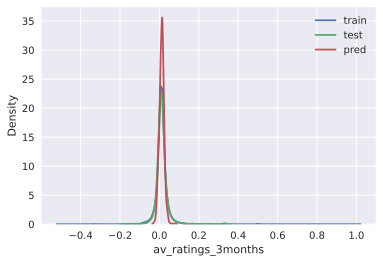

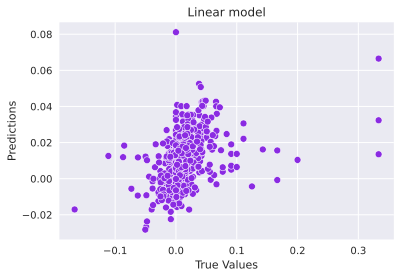

In [124]:
target_distr_linear(y_train, y_test, y_pred)   

In [125]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.000925470934077272
RMSE:  0.030421553774869423
R2:    0.14435656585114998
MAE:   0.01535997988030484
MedAE: 0.008948667667625917
------------------------------


In [126]:
cat_model.save_model('cat_reg_okko_ratings_cat_ntop')

**Feature importance**

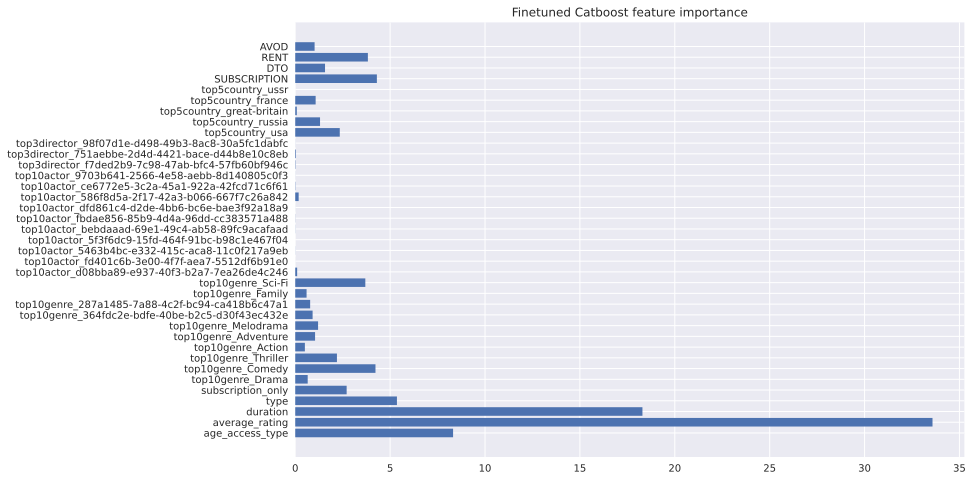

In [127]:
get_feature_imp(cat_model, train_dataset)

1)  The most influential features:  
    - duration  
    - average_rating  
    - age_access_type  

2)  The lowest influential features:  
    - actors and directors are not so important

**Detecting heteroscedasticity**

**Graphical Method:**

Firstly do the regression analysis and then plot the error terms against the predicted values. 
If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

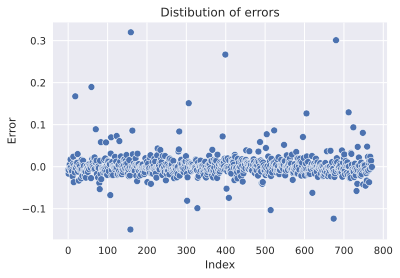

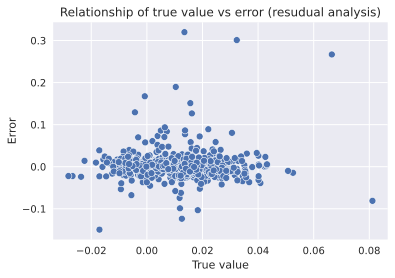

In [128]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

**Conclusion**
* The trend in the second figure is not visible, now we will confirm the presence of heteroskedasticity on tests.

# Tuning

In [ ]:
train_dataset = cat.Pool(X_train, y_train, 
                         cat_features=cat_features) 

test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [ ]:
parameters_distr = {'depth': randint(5, 10),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [5000, 10000, 15000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_okko_rat_ntop', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

In [ ]:
best_cat = grid.best_estimator_
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
best_cat.save_model('cat_reg_ratings_okko_best_ntop')

In [ ]:
y_pred = best_cat.predict(test_dataset)

In [ ]:
target_distr_linear(y_train, y_test, y_pred)  

In [ ]:
calc_metrics(y_test, y_pred)

In [ ]:
get_feature_imp(best_cat, train_dataset)

In [ ]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)